## Исследование данных о российском кинопрокате



Заказчик этого исследования — Министерство культуры Российской Федерации. 
Вам нужно изучить рынок российского кинопроката и выявить текущие тренды. Уделите внимание фильмам, которые получили государственную поддержку. Попробуйте ответить на вопрос, насколько такие фильмы интересны зрителю. 
Вы будете работать с данными, опубликованными на портале открытых данных Министерства культуры. Набор данных содержит информацию о прокатных удостоверениях, сборах и государственной поддержке фильмов, а также информацию с сайта КиноПоиск. 
____
Нужно изучить информацию о фильмах которые были выпущены в прокат, а также посмотреть какие закономерности присутствуют в данных о фильмах  гос. поддержкой

### Шаг 1. Откройте файлы с данными и объедините их в один датафрейм. 

Объедините данные таким образом, чтобы все объекты из датасета `mkrf_movies` обязательно вошли в получившийся датафрейм. 

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_0" aria-expanded="false" aria-controls="collapseHint_0">Подсказка</button>
        </div>
        <div id="collapseHint_0" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Обратите внимание на тип данных столбца, по которому будете соединять датафреймы. Тип данных этих столбцов должен быть одинаковым в обоих датафреймах.
            </div>
        </div>
    </div>
</div>

Для начала импортируем необходимые библиотеки

In [1]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns
import missingno as msno

Теперь посмотрим на два датафрейма в проекте, чтобы понять, как лучше их нам объединить.

In [3]:
mkrf_movies = pd.read_csv('/datasets/mkrf_movies.csv')
mkrf_movies.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный"
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"


In [64]:
mkrf_shows = pd.read_csv('/datasets/mkrf_shows.csv')
mkrf_shows.head()

,puNumber,box_office
0,111000113,2.450000e+03
1,111000115,6.104000e+04
2,111000116,1.530300e+08
3,111000117,1.226096e+07
4,111000118,1.636841e+08


Перед нами два датафрейма, один из которых меньше на порядок. Объединять их будем по столбцу `puNumber`, но перед этим проверим типы данных в каждом столбце и если это необходимо, то приведем их к одному.

In [5]:
print(mkrf_movies['puNumber'].dtype)
print(mkrf_shows['puNumber'].dtype)

object
int64


В первом случае мы имеем строковый тип данных. Проверим содержимое столбца и при необходимости заменим значения в столбце.

In [6]:
mkrf_movies['puNumber'].sort_values().unique()

array([' 111004112', '111000110', '111000111', ..., '231001012',
       '231001111', 'нет'], dtype=object)

Мы имеем буквенное выражение `нет` в столбце с цифровыми значениями. Заменим его пока что на ноль и изменим тип данных.

In [7]:
mkrf_movies.loc[mkrf_movies['puNumber'] == 'нет', 'puNumber'] = 0 
mkrf_movies['puNumber'] = mkrf_movies['puNumber'].astype('int')

Объединим два датафрейма по столбцу с номером прокатного удостоверения

In [8]:
data = mkrf_movies.merge(mkrf_shows, on='puNumber', how='left')

Выведем итоговый датафрейм на экран.

In [65]:
data.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,...,financing_source,ratings,genres,box_office,year,main_director,main_genres,support_share,payback,payback_result
0,Открытый простор,221048915,2015-11-27 12:00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",None,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",18+,NaN,...,NaN,7.2,"боевик,драма,мелодрама",NaN,2015,Кевин Костнер,боевик,NaN,NaN,не известно
1,Особо важное задание,111013716,2016-09-13 12:00:00,Художественный,"Киностудия ""Мосфильм""",None,Е.Матвеев,NaN,6+,NaN,...,NaN,6.6,"драма,военный",NaN,2016,Е.Матвеев,драма,NaN,NaN,не известно
2,Особо опасен,221038416,2016-10-10 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",None,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",18+,NaN,...,NaN,6.8,"фантастика,боевик,триллер",NaN,2016,Тимур Бекмамбетов,фантастика,NaN,NaN,не известно
3,Особо опасен,221026916,2016-06-10 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",None,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",18+,NaN,...,NaN,6.8,"фантастика,боевик,триллер",NaN,2016,Тимур Бекмамбетов,фантастика,NaN,NaN,не известно
4,Особо опасен,221030815,2015-07-29 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",None,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",18+,NaN,...,NaN,6.8,"фантастика,боевик,триллер",NaN,2015,Тимур Бекмамбетов,фантастика,NaN,NaN,не известно


### Шаг 2. Предобработка данных

#### Шаг 2.1. Проверьте типы данных

- Проверьте типы данных в датафрейме и преобразуйте их там, где это необходимо.

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   int64  
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

В столбце с датой премьеры фильма мы имеем строковый тип данных, вместо `datetime`. Столбец с вазвратной и невозвратное государственной поддержкой округлим до целочисленных значений для удобства. Также мы поступим со столбцами `budget`, `box_office`. `ratings` мы переведем в вещественный тип данных, чтобы в дальнейшем можно было сравнивать строки по этому столбцу, если это будет необходимо.

In [11]:
data['show_start_date'] = pd.to_datetime(data['show_start_date'], format='%Y-%m-%dT%H:%M:%S.%fZ') #изменяем тип даннных в столбце 
                                                                                              #с датой релиза

In [12]:
data['refundable_support'] = np.floor(data['refundable_support'].astype('Int64')) #заменим тип данных на целочисленный
data['nonrefundable_support'] = np.floor(data['nonrefundable_support'].astype('Int64')) #игнорируя пропуски в столбцах
data['budget'] = np.floor(data['budget'].astype('Int64'))
data['box_office'] = data['box_office'].round()

In [13]:
data['ratings'].sort_values().unique()

array(['1.0', '1.1', '1.2', '1.3', '1.4', '1.5', '1.6', '1.7', '1.8',
       '1.9', '19%', '2.1', '2.4', '2.5', '2.6', '2.7', '2.8', '2.9',
       '28%', '3.0', '3.1', '3.2', '3.3', '3.4', '3.5', '3.6', '3.7',
       '3.8', '3.9', '4.0', '4.1', '4.2', '4.3', '4.4', '4.5', '4.6',
       '4.7', '4.8', '4.9', '5.0', '5.1', '5.2', '5.3', '5.4', '5.5',
       '5.6', '5.7', '5.8', '5.9', '6.0', '6.1', '6.2', '6.3', '6.4',
       '6.5', '6.6', '6.7', '6.8', '6.9', '62%', '64%', '7.0', '7.1',
       '7.2', '7.3', '7.4', '7.5', '7.6', '7.7', '7.8', '7.9', '79%',
       '8.0', '8.1', '8.2', '8.3', '8.4', '8.5', '8.6', '8.7', '8.8',
       '8.9', '83%', '88%', '89%', '9.0', '9.1', '9.2', '90%', '91%',
       '94%', '97%', '98%', '99%', nan], dtype=object)

Мы видим значения рейтинга фильмов в процентах. Т.к. оценочная шкала от 1-10, то верным будет преобразовать процентные значения рейтинга в привычную нам форму.

In [14]:
data['ratings'] = data['ratings'].fillna('') #заменим пропуски пустыми значениями для обработки столбца
if data['ratings'].str.contains('%').any():
    data.loc[data['ratings'].str.contains('%'), 'ratings'] = data['ratings'].str[0] + '.' + data['ratings'].str[1]
        
data['ratings'] = data['ratings'].replace('', np.nan) #вернем пропуски обратно, чтобы можно было преобразовать тип столбца
data['ratings'].sort_values().unique()

array(['1.0', '1.1', '1.2', '1.3', '1.4', '1.5', '1.6', '1.7', '1.8',
       '1.9', '2.1', '2.4', '2.5', '2.6', '2.7', '2.8', '2.9', '3.0',
       '3.1', '3.2', '3.3', '3.4', '3.5', '3.6', '3.7', '3.8', '3.9',
       '4.0', '4.1', '4.2', '4.3', '4.4', '4.5', '4.6', '4.7', '4.8',
       '4.9', '5.0', '5.1', '5.2', '5.3', '5.4', '5.5', '5.6', '5.7',
       '5.8', '5.9', '6.0', '6.1', '6.2', '6.3', '6.4', '6.5', '6.6',
       '6.7', '6.8', '6.9', '7.0', '7.1', '7.2', '7.3', '7.4', '7.5',
       '7.6', '7.7', '7.8', '7.9', '8.0', '8.1', '8.2', '8.3', '8.4',
       '8.5', '8.6', '8.7', '8.8', '8.9', '9.0', '9.1', '9.2', '9.4',
       '9.7', '9.8', '9.9', nan], dtype=object)

Ура! Избавились от этих процентов, теперь можно перевести тип данных в `float`

In [15]:
data['ratings'] = pd.to_numeric(data['ratings'])
data['ratings'].dtype

dtype('float64')

#### Шаг 2.2. Изучите пропуски в датафрейме

- Объясните, почему заполнили пропуски определённым образом или почему не стали этого делать.

Для начала выведем на экран показатели пропущенных значений по каждому столбцу и построим наглядный график.

In [16]:
data.isna().sum()

title                       0
puNumber                    0
show_start_date             0
type                        0
film_studio                18
production_country          2
director                    9
producer                  568
age_restriction             0
refundable_support       7154
nonrefundable_support    7154
budget                   7154
financing_source         7154
ratings                   967
genres                    976
box_office               4328
dtype: int64

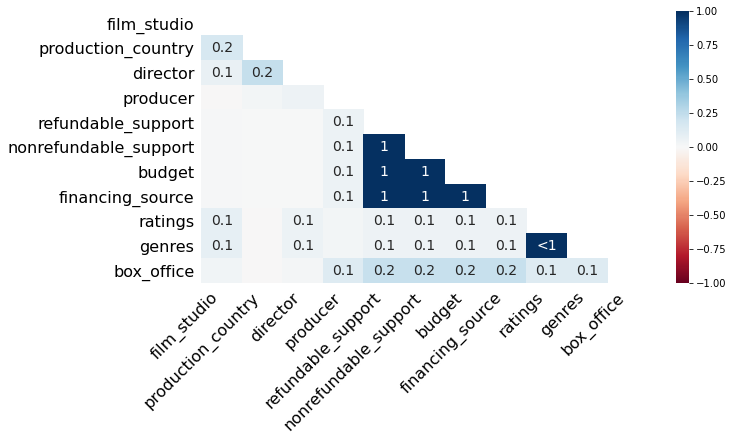

In [17]:
msno.heatmap(data, figsize=(10, 5));

Выше мы отобразили хитмэп с пропущенными значениями в столбцах и связью между пропущенными значениями в каждом столбце. Цифрами от 0.1 до 1 показана зависимость между пропусками в столбцах. Мы видим, что в столбцах со значениями объема возвратных/невозвратных средств государственной поддержки, общего бюджета, источника государственного финансирования пропуски находятся в одних и тех же строках. Очевидно пропуски в этих столбцах связаны с источником государственного финансирования. Посмотрим на строки с имеющимися значениями в этом столбце.

In [18]:
data[data['budget'].isna() == False]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
1281,Пока еще жива,111005313,2013-10-11 12:00:00,Художественный,"АНО содействия развитию кинематографии ""Ангел-...",Россия,А.Атанесян,"А.Атанесян, М.Бабаханов, Р.Бутко",«16+» - для детей старше 16 лет,0.0,26500000.0,79411900.0,Министерство культуры,8.1,"драма,мелодрама",365354.0
1448,Бесславные придурки,111003314,2014-03-28 12:00:00,Художественный,"ООО ""Компания ""АТК-Студио""",Россия,А.Якимчук,А.Тютрюмов,«12+» - для детей старше 12 лет,0.0,26000000.0,37142857.0,Министерство культуры,NaN,NaN,28140.0
1498,Невидимки,111004213,2013-09-10 12:00:00,Художественный,"ООО ""Компания ""РЕАЛ-ДАКОТА""",Россия,"Р.Давлетьяров, С.Комаров","Р.Давлетьяров, А.Котелевский, А.Олейников",«12+» - для детей старше 12 лет,0.0,107847945.0,176023490.0,Фонд кино,5.3,"комедия,фантастика",19957032.0
1524,БЕРЦЫ,111004314,2014-05-05 12:00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,Е.Миндадзе (псевдоним Катя Шагалова),Л.Антонова,«16+» - для детей старше 16 лет,0.0,28000000.0,40574140.0,Министерство культуры,4.2,драма,55918.0
1792,Братья Ч,111004414,2014-04-23 12:00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,М.Угаров,"А.Миндадзе, Л.Антонова",«16+» - для детей старше 16 лет,0.0,25000000.0,40015122.0,Министерство культуры,6.4,драма,232100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7464,Союз спасения,111022019,2019-12-26 12:00:00,Художественный,"ЗАО ""Дирекция кино""",Россия,А.Кравчук,"А.Максимов, К.Эрнст",«12+» - для детей старше 12 лет,100000000.0,400000000.0,980000000.0,Фонд кино,6.0,"история,биография,драма",717703186.0
7466,Иван Царевич и Серый Волк 4,114005019,2019-12-20 12:00:00,Анимационный,"ООО ""Студия анимационного кино ""Мельница""",Россия,"Д.Шмидт, К.Феоктистов","С.Сельянов, А.Боярский",«6+» - для детей старше 6 лет,100000000.0,0.0,190000000.0,Фонд кино,6.7,"мультфильм,приключения,семейный",501069235.0
7474,Вторжение,111022519,2019-12-23 12:00:00,Художественный,"ООО ""Арт Пикчерс Студия"", ООО ""Водород 2011""",Россия,Ф.Бондарчук,"Ф.Бондарчук, М.Врубель, А.Андрющенко, Д.Рудовский",«12+» - для детей старше 12 лет,100000000.0,400000000.0,944000000.0,Фонд кино,5.7,"фантастика,боевик",NaN
7476,Я свободен,111023019,2019-12-26 12:00:00,Художественный,"АО ""ТПО ""Киностудия им. М.Горького""",Россия,И.Северов,С.Зернов,«12+» - для детей старше 12 лет,0.0,30000000.0,46154000.0,Министерство культуры,5.9,драма,NaN


Видно, что все фильмы в видимом диапазоне российского производства. Посмотрим сколько и какие значения в столбце со страной производства.

In [19]:
data[data['budget'].isna() == False]['production_country'].value_counts()

Россия                                        316
Россия, Италия                                  2
Россия, Германия                                2
Россия, Германия, Великобритания                1
Россия, Германия, Казахстан, Польша, Китай      1
Россия-Китай                                    1
Россия, Сербия                                  1
Россия - Грузия                                 1
Россия-Украина                                  1
Россия, Бельгия, Финляндия                      1
Россия, Армения                                 1
Россия, Украина, Польша                         1
Россия, Латвия, Чешская Республика              1
Россия, Франция, Латвия                         1
Россия-Словакия-Чехия                           1
Name: production_country, dtype: int64

Вот и ответ! Все строки, где значения не пропущены принадлежат отечественному производству. Очевидно пропущенные значения в этих столбцах связаны с тем, что статистика по другим странам просто-напросто не велась.

Также на хитмэпе была выявлена взаимосвязь между пропущенными значениями в столбцах с рейтингом и жанром фильма. Посмотрим на эти строки.

In [20]:
data[data['ratings'].isna() == True].sample(5)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
2909,"Машкины Cтрашилки. Серия ""Зловещая сага о боль...",114001416,2016-05-06 12:00:00,Анимационный,"ООО Студия ""АНИМАККОРД"" - ANIMACCORD LTD.",Россия - Республика Кипр,Д.Червяцов,"Д.Ловейко, О.Кузовков",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2386,Гаэтано Доницетти. Любовный напиток. Постановк...,126005314,2014-12-19 12:00:00,Прочие,Артс Альянс Дистрибьюшн,Великобритания,Лоран Пелли,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2430,Сборник короткометражных чёрных комедий,121029814,2014-12-29 12:00:00,Художественный,Блэк Комеди Шортс,Германия - Швейцария - Франция - Южная Корея -...,"Шейн Аткинсон, Питер Бауман, Парк Дже Ин, Реми...","Оливер Берлемонт, Симон Болтон-Габриельсон, Ли...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,NaN,NaN,1797072.0
6469,МУЛЬТ в кино. Выпуск № 86,114008618,2018-12-08 12:00:00,Анимационный,"ООО ""Мульт в кино""",Россия,О.Семёнова,П.Смирнов,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
867,Джузеппе Верди. Луиза Миллер /По пьесе Фридрих...,126000913,2013-03-11 12:00:00,Прочие,"Эр А И Синема, , Юнител Классика",Италия,Дени Криеф,"Эрика Вителлоззи, Франко Консолани",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Не обнаружено видимых взаимосвязей. Возможно стоит уточнить у тех, кто выгружал данные.

Займемся обработкой пропусков в оставшихся столбцах. Начнем со столбцов `film_studio`, `production_country`, `director`. В столбцах в сумме 29 пропущенных значений, это 0.4% данных. Можно просто удалить строки с пропущенными значениями. На результаты исследования они никак не повлияют.

In [21]:
data = data.dropna(subset=['film_studio', 'production_country', 'director']).reset_index(drop=True)

У нас остаются пропуски в столбцах с рейтингом, жанром и продюсером фильма. Для заполнения данных о продюсерах фильмов нам придется делать запрос по каждому фильму, это займет много времени, но т.к. на наш анализ пустые значения в этих строках никак не повлияют мы не станем этим заниматься. Аналогично с жанром фильма и его рейтингом. Несмотря на то, что значения в столбе с рейтингом количественные (мы можем сравнить эти значения между собой), заполнить их используя статистические меры центральной тенденции мы тоже не сможем, исказится наша выборка. Оставим пропуски как есть.

#### Шаг 2.3. Изучите дубликаты в датафрейме
- Проверьте, есть ли в данных дубликаты. Опишите причины, которые могли повлиять на появление дублей.

In [22]:
data.duplicated().sum()

0

Явные дубликаты отсутствуют в датафрейме, посмотрим на неявные. Изучим столбцы с категориальными значениями.

In [23]:
print('Количество дубликатов в столбце с названием фильмов', data['title'].duplicated().sum())
print('Количество дубликатов в столбце с прокатными удостоверениями', data['puNumber'].duplicated().sum())

Количество дубликатов в столбце с названием фильмов 713
Количество дубликатов в столбце с прокатными удостоверениями 2


In [24]:
data.loc[data['title'].duplicated(keep=False)].sort_values(by='title')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
454,100 миллионов евро,221024616,2016-05-25 12:00:00,Художественный,"Патэ, Эсквуд, Серенити Фильм, ТФ1 Фильм Продюк...",Франция,Оливер Барру,Ричард Грандпьерр,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.1,комедия,NaN
455,100 миллионов евро,121013712,2012-06-06 12:00:00,Художественный,"Патэ, Эсквуд, Серенити Фильм, ТФ1 Фильм Продюк...",Франция,Оливер Барру,Ричард Грандпьерр,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.1,комедия,NaN
5047,127 часов,221069011,2011-05-18 12:00:00,Художественный,"Фокс Серчлайт Пикчерз, Клод Эйт Филмз, Филм Фо...",США - Великобритания,Дэнни Бойл,"Бернард Беллью, Тесса Росс, Гаррет Смит",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.7,"триллер,биография,драма",NaN
4843,127 часов,121000811,2011-01-27 12:00:00,Художественный,"Фокс Серчлайт Пикчерз, Клод Эйт Филмз, Филм Фо...",США - Великобритания,Дэнни Бойл,"Бернард Беллью, Тесса Росс, Гаррет Смит",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.7,"триллер,биография,драма",NaN
3126,13 часов: Тайные солдаты Бенгази,221019616,2016-04-19 12:00:00,Художественный,"Парамаунт, Дан Филмз, Латина Пикчарз,3 Арт Инт...",США,Майкл Бэй,"Майкл Бэй, Эрвин Стофф",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.7,"боевик,триллер,драма",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1808,Этим утром в Нью-Йорке,221033214,2014-08-20 12:00:00,Художественный,"Лэндскейп Интертейнмент, Форс Мажор, Проминент...",США,Фил Олден Робинсон,"Боб Купер, Тайлер Митчелл, Дэниэл Дж. Уолкер",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,6.2,"драма,комедия",1090.0
4065,Я ненавижу день святого Валентина,121002010,2010-02-04 12:00:00,Художественный,"Блю Стар Пикчерз, Ай Хэйт Вдэй Продакшнз, Ай С...",США,Ниа Вардалос,"Доминик Йанно, Мэдлейн Шерак, Уильям Шерак",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,5.0,"мелодрама,комедия",NaN
4496,Я ненавижу день святого Валентина,221139210,2010-12-03 12:00:00,Художественный,"Блю Стар Пикчерз, Ай Хэйт Вдэй Продакшнз, Ай С...",США,Ниа Вардалос,"Доминик Йанно, Мэдлейн Шерак, Уильям Шерак",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,5.0,"мелодрама,комедия",NaN
1701,"Я, снова я и мама",121013116,2016-05-23 12:00:00,Художественный,"Гомон, Эль Джи Эм Продакшнз, Ректанль Продюксь...",Франция - Бельгия,Гийом Гальенн,"Жан-Батист Дюпон, Алис Жирар, Сирил Кольбо-Жюстен",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.3,"комедия,мелодрама,драма",NaN


Судя по строкам с дубликатами одинаковые значения в столбце `title` не стоит удалять, т.к. у этих фильмов разные прокатные удостоверения и дата показа. Давайте проверим строки с одинаковыми значениями прокатных номеров.

In [25]:
data.loc[data['puNumber'].duplicated(keep=False)]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4629,Как жениться и остаться холостым,221154310,2010-12-17 12:00:00,Художественный,"Ше Вам, Скрипт Ассосье, Тэ Фэ 1 Фильм Продюксь...",Франция,Эрик Лартиго,"Амандин Било, Алан Шаба",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.0,"мелодрама,комедия",NaN
4630,Иоанна - женщина на папском престоле /По роман...,221154310,2010-12-17 12:00:00,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.6,"драма,мелодрама,история",NaN
5056,Анализируй это!,221054410,2010-05-25 12:00:00,Художественный,"Уорнер Бразерс, Вилладж Роудшоу Филмз ЛТД",США-Австралия,ХЭрольд Рэмис,"Джейн Розенталь, Пола Уейнстейн",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.4,"комедия,криминал",NaN
5057,Анализируй то!,221054410,2010-05-25 12:00:00,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,6.8,"комедия,криминал",NaN


У нас имеются две строки с одинаковым названием фильма и прокатным номером. При этом режиссер, рейтинг, возрастное ограничение и жанр разные. Оставим как есть, на исследование эта строка никак не повлияет. Остальные столбцы с категориальными значениями мы не будем трогать, т.к. каждая строка содержит уникальные данные о фильме, которые могут повторяться. 

#### Шаг 2.4. Изучите категориальные значения

- Посмотрите, какая общая проблема встречается почти во всех категориальных столбцах;
- Исправьте проблемные значения в поле `type`.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_1" aria-expanded="false" aria-controls="collapseHint_1">Подсказка</button>
        </div>
        <div id="collapseHint_1" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
В поле <code>type</code> есть несколько значений, у которых появился пробел в начале строки. Самый простой способ их «починить» -- использовать метод <a href="https://pandas.pydata.org/docs/reference/api/pandas.Series.str.strip.html#pandas.Series.str.strip">.str.strip</a>. Этот метод удаляет все пробелы, которые встречаются в начале и в конце строки. Применяют его таким образом:<br>
<code>df['type'].str.strip()</code>
            </div>
        </div>
    </div>
</div>

Посмотрим на данные в столбцах с категориальными значениями и определим основные закономерности. 

In [26]:
data['type'].sort_values().unique()

array([' Анимационный', ' Художественный', 'Анимационный',
       'Документальный', 'Музыкально-развлекательный',
       'Научно-популярный', 'Прочие', 'Художественный'], dtype=object)

In [27]:
data['production_country'].sort_values().unique()

array([' СССР', ' СССР ', ' СССР   ', '2019', 'CША', 'Австралия',
       'Австралия - Великобритания - Бельгия - Индия',
       'Австралия - Германия', 'Австралия - Ирландия',
       'Австралия - Колумбия', 'Австралия - США', 'Австралия, Канада',
       'Австралия, США', 'Австралия-Великобритания', 'Австралия-Ирландия',
       'Австралия-США', 'Австралия-Турция-США', 'Австрия',
       'Австрия - Германия', 'Австрия - Германия - Франция',
       'Австрия - Люксембург', 'Австрия, Великобритания, Германия',
       'Австрия-Германия-Франция', 'Австрия-Франция-Германия',
       'Азербайджан-Россия', 'Аргентина', 'Аргентина - Бразилия',
       'Аргентина - Испания', 'Аргентина - Испания - Уругвай',
       'Аргентина - Мексика - Бразилия - Франция - США',
       'Аргентина - Уругвай - Россия - Германия - Франция - Нидерланды',
       'Аргентина - Франция - Испания', 'Аргентина, Испания',
       'Аргентина-Испания', 'Армения', 'Армения - Германия',
       'Армения - Казахстан', 'Армения-Россия

Мы видим общую проблему в категориальных данных. Присутсвуют лишние пробелы в строках, а также слова в столбце со значениями стран производства разделены и пробелами, и запятыми. Думаю в таком заполнении значений столбцов виноват человеческий фактор. Поработаем над этими значениями.

In [28]:
data['type'] = data['type'].str.strip()
data['type'].sort_values().unique()

array(['Анимационный', 'Документальный', 'Музыкально-развлекательный',
       'Научно-популярный', 'Прочие', 'Художественный'], dtype=object)

In [29]:
data['production_country'] = data['production_country'].str.strip()
data['production_country'].sort_values().unique()

array(['2019', 'CША', 'Австралия',
       'Австралия - Великобритания - Бельгия - Индия',
       'Австралия - Германия', 'Австралия - Ирландия',
       'Австралия - Колумбия', 'Австралия - США', 'Австралия, Канада',
       'Австралия, США', 'Австралия-Великобритания', 'Австралия-Ирландия',
       'Австралия-США', 'Австралия-Турция-США', 'Австрия',
       'Австрия - Германия', 'Австрия - Германия - Франция',
       'Австрия - Люксембург', 'Австрия, Великобритания, Германия',
       'Австрия-Германия-Франция', 'Австрия-Франция-Германия',
       'Азербайджан-Россия', 'Аргентина', 'Аргентина - Бразилия',
       'Аргентина - Испания', 'Аргентина - Испания - Уругвай',
       'Аргентина - Мексика - Бразилия - Франция - США',
       'Аргентина - Уругвай - Россия - Германия - Франция - Нидерланды',
       'Аргентина - Франция - Испания', 'Аргентина, Испания',
       'Аргентина-Испания', 'Армения', 'Армения - Германия',
       'Армения - Казахстан', 'Армения-Россия', 'Бельгия',
       'Бельгия -

Теперь поработаем над разделителями в столбцах. 

In [30]:
def sep_countries(row):
    try:
        if '-' in row:
            return row.replace('-', ',')
        if ' ,' in row:
            return row.replace(' ,', ',')
    except:
        pass        
    
data['production_country'] = data['production_country'].apply(sep_countries)

In [31]:
data['production_country'].sort_values().unique()

array(['Австралия , Великобритания , Бельгия , Индия',
       'Австралия , Германия', 'Австралия , Ирландия',
       'Австралия , Колумбия', 'Австралия , США',
       'Австралия,Великобритания', 'Австралия,Ирландия', 'Австралия,США',
       'Австралия,Турция,США', 'Австрия , Германия',
       'Австрия , Германия , Франция', 'Австрия , Люксембург',
       'Австрия,Германия,Франция', 'Австрия,Франция,Германия',
       'Азербайджан,Россия', 'Аргентина , Бразилия',
       'Аргентина , Испания', 'Аргентина , Испания , Уругвай',
       'Аргентина , Мексика , Бразилия , Франция , США',
       'Аргентина , Уругвай , Россия , Германия , Франция , Нидерланды',
       'Аргентина , Франция , Испания', 'Аргентина,Испания',
       'Армения , Германия', 'Армения , Казахстан', 'Армения,Россия',
       'Бельгия , Германия , Люксембург',
       'Бельгия , Германия , Люксембург , Франция',
       'Бельгия , Испания , Канада , Нидерланды',
       'Бельгия , Италия , Франция', 'Бельгия , Люксембург',
     

In [32]:
data['production_country'] = data['production_country'].replace('Бразилия, Германия, Порртугалия, Франция', 'Бразилия, Германия, Португалия, Франция')
data['production_country'] = data['production_country'].replace('Бразилия, К;анада', 'Бразилия, Канада')
data['production_country'] = data['production_country'].replace('Великобритания,Австралия, США', 'Великобритания, Австралия, США')
data['production_country'] = data['production_country'].replace('США, Великобритания, Германия,, Швеция, Канада', 'США, Великобритания, Германия, Швеция, Канада')
data['production_country'] = data['production_country'].replace('США, Объединенные Арабские Эмираты', 'США, ОАЭ')
data['production_country'] = data['production_country'].replace('США, Пуэрто,Рико, Франция', 'США, Пуэрто Рико, Франция')
data['production_country'] = data['production_country'].replace('США, Хорватия, Босния,Герцеговина', 'США, Хорватия, Босния и Герцеговина')
data['production_country'] = data['production_country'].replace('США,Великобритания, Австралия', 'США, Великобритания, Австралия')
data['production_country'] = data['production_country'].replace('США,Германия', 'США, Германия')

In [33]:
data['production_country'].sort_values().unique()

array(['Австралия , Великобритания , Бельгия , Индия',
       'Австралия , Германия', 'Австралия , Ирландия',
       'Австралия , Колумбия', 'Австралия , США',
       'Австралия,Великобритания', 'Австралия,Ирландия', 'Австралия,США',
       'Австралия,Турция,США', 'Австрия , Германия',
       'Австрия , Германия , Франция', 'Австрия , Люксембург',
       'Австрия,Германия,Франция', 'Австрия,Франция,Германия',
       'Азербайджан,Россия', 'Аргентина , Бразилия',
       'Аргентина , Испания', 'Аргентина , Испания , Уругвай',
       'Аргентина , Мексика , Бразилия , Франция , США',
       'Аргентина , Уругвай , Россия , Германия , Франция , Нидерланды',
       'Аргентина , Франция , Испания', 'Аргентина,Испания',
       'Армения , Германия', 'Армения , Казахстан', 'Армения,Россия',
       'Бельгия , Германия , Люксембург',
       'Бельгия , Германия , Люксембург , Франция',
       'Бельгия , Испания , Канада , Нидерланды',
       'Бельгия , Италия , Франция', 'Бельгия , Люксембург',
     

Мы почистили данные в столбцах `type` и `production_country`. Для удобства заменим значения в столбце с ограничениями в возрасте на более короткие. Для начала посмотрим какие в принципе значения присутствуют в столбце.

In [34]:
data['age_restriction'].sort_values().unique()

array(['«0+» - для любой зрительской аудитории',
       '«12+» - для детей старше 12 лет',
       '«16+» - для детей старше 16 лет', '«18+» - запрещено для детей',
       '«6+» - для детей старше 6 лет'], dtype=object)

In [35]:
def age_restrict(row):
    try:
        if '0' in row:
            return '0+'
        if '12+' in row:
            return '12+'
        if '16+' in row:
            return '16+'
        if '6+'in row:
            return '6+'
        if '18+' in row:
            return '18+'
    except:
        return 'другая категория'
    
data['age_restriction'] = data['age_restriction'].apply(age_restrict)

#### Шаг 2.5. Проверьте количественные значения

- Проверьте, обнаружились ли в таких столбцах подозрительные данные. Как с такими данными лучше поступить?

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_budget" aria-expanded="false" aria-controls="collapseHint_budget">Подсказка</button>
        </div>
        <div id="collapseHint_budget" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Обратите внимание на описание столбца <code>budget</code>. Как этот столбец соотносится с двумя другими: <code>refundable_support</code> и <code>nonrefundable_support</code>?
            </div>
        </div>
    </div>
</div>

Мы уже выяснили, что наличие значений в столбцах с бюджетом фильмов, а также значений гос. поддержки присутсвуют в фильмах отечественного производства. Также в описании к столбцу с общим бюджетом фильмов было сказано, что данные в этом столбце указаны для тех фильмов, что получили гос. поддержку. То есть если фильм получил гос. поддержку, то его бюджет обязательно должен равняться как минимум сумме государственной поддержки. Посмотрим строки, где бюджет равен 0.

In [36]:
data[data['budget'] == 0]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
2050,14+,111023614,2014-12-19 12:00:00,Художественный,"ООО Киностудия ""Сентябрь""",None,А.Зайцев,"О.Гранина, А.Зайцев",16+,0.0,23000000.0,0.0,"Министерство культуры, Фонд кино",6.6,мелодрама,1.023402e+07
2055,Дуxless 2,111000415,2015-01-26 12:00:00,Художественный,"ООО ""Киностудия ""Слово"", ООО ""Арт Пикчерс Студия""",None,Р.Прыгунов,"П.Ануров, Ф.Бондарчук, Д.Рудовский",16+,0.0,75000000.0,0.0,Фонд кино,6.6,драма,4.461635e+08
2469,Воин (2015),111017315,2015-09-28 12:00:00,Художественный,"ООО ""Форпост Продакшн"", ООО ""Арт Пикчерс Студия""",None,А.Андрианов,"ООО ""Арт Пикчерс Студия""",12+,10000000.0,70000000.0,0.0,Фонд кино,7.8,"боевик,драма,криминал",1.965724e+08
2529,Бармен.,111009615,2015-05-26 12:00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",None,Д.Штурманова,Т.Вайнштейн,16+,20000000.0,0.0,0.0,Фонд кино,6.2,"комедия,фэнтези",6.741898e+07
2612,Савва. Сердце воина,114001715,2015-07-21 12:00:00,Анимационный,"ООО ""Глюкоза Продакшн"", ООО ""Арт Пикчерс Студия""",None,М.Фадеев,А.Чистяков,6+,60000000.0,100000000.0,0.0,Фонд кино,4.6,"мультфильм,приключения,фэнтези",1.844876e+08
2681,Тряпичный союз,111010215,2015-06-08 12:00:00,Художественный,"ООО ""Кинокомпания ""КОКТЕБЕЛЬ""",None,М.Местецкий,"Р.Борисевич, А.Кушаев",18+,0.0,59000000.0,0.0,Фонд кино,6.3,"комедия,драма",1.957739e+06
2785,Срочно выйду замуж,111017115,2015-09-30 12:00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",None,С Чекалов,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",16+,0.0,35000000.0,0.0,Фонд кино,5.1,"комедия,мелодрама",7.293778e+07
2871,Помню - не помню!,111004916,2016-03-01 12:00:00,Художественный,"ООО ""КиноФирма""",None,В.Ровенский,"ООО ""КиноФирма""",12+,0.0,6000000.0,0.0,Министерство культуры,4.3,комедия,1.536293e+07
3044,Любовь с ограничениями,111008216,2016-04-29 12:00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",None,Д.Тюрин,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",16+,19000000.0,51000000.0,0.0,Фонд кино,6.3,"комедия,мелодрама",7.029905e+07
3561,Притяжение (2016),111018116,2016-12-16 12:00:00,Художественный,"ООО ""Водород 2011"", ООО ""Арт Пикчерс Студия""",None,Ф.Бондарчук,"ООО ""Арт Пикчерс Студия""",12+,0.0,250000000.0,0.0,Фонд кино,5.6,фантастика,1.038321e+09


Видно, что в этих строках присутсвуют значения в столбцах `refundable_support` и `notrefundable_support`. Мы могли бы заполнить пустые значения в столбце с общим бюджетом суммой значений в столбцах с гос. поддержкой., но таким образом при подчетах доли гос. поддержки в общим бюджете фильма мы создадим пики, где доля будет равна единице. Оставим данные как есть 

#### Шаг 2.6. Добавьте новые столбцы





- Создайте столбец с информацией о годе проката. Выделите год из даты премьеры фильма.

In [37]:
data['year'] = data['show_start_date'].dt.year

- Создайте два столбца: с именем и фамилией главного режиссёра и основным жанром фильма. В столбцы войдут первые значения из списка режиссёров и жанров соответственно.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_2" aria-expanded="false" aria-controls="collapseHint_2">Подсказка</button>
        </div>
        <div id="collapseHint_2" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Чтобы создать такие столбцы, лучше всего использовать собственную функцию. Эту функцию можно применить к двум столбцам сразу. 
            </div>
        </div>
    </div>
</div>

In [38]:
def main_value(df, columns):
    for column in columns:
        df[f'main_{column}'] = df[column].dropna().apply(lambda x: x.split(',')[0])
    return df

data = main_value(data, ['director', 'genres'])

In [39]:
data.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year,main_director,main_genres
0,Открытый простор,221048915,2015-11-27 12:00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",None,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",18+,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN,2015,Кевин Костнер,боевик
1,Особо важное задание,111013716,2016-09-13 12:00:00,Художественный,"Киностудия ""Мосфильм""",None,Е.Матвеев,NaN,6+,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN,2016,Е.Матвеев,драма
2,Особо опасен,221038416,2016-10-10 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",None,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",18+,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,2016,Тимур Бекмамбетов,фантастика
3,Особо опасен,221026916,2016-06-10 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",None,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",18+,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,2016,Тимур Бекмамбетов,фантастика
4,Особо опасен,221030815,2015-07-29 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",None,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",18+,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,2015,Тимур Бекмамбетов,фантастика


- Посчитайте, какую долю от общего бюджета фильма составляет государственная поддержка.

Добавим столбец с долей государственной поддержки от общего бюджета и округлим это значение до двух знаков после запятой.

In [40]:
data['support_share'] = round((data['refundable_support'] + data['nonrefundable_support']) / data['budget'], 2)

Для исследования окупаемости фильмов добавим столбце с данными об окупаемости фильмов. 

In [41]:
data['payback'] = round((data['box_office'] - data['refundable_support']) / data['budget'], 2)

Теперь создадим столбец, в котором будет информация о том окупился фильм или нет. Фильм окупился если коэффициент из столбца `payback` больше единицы. (Мы не берем значения, равные единицы, потому что это значит, что фильм вышел в ноль)

In [42]:
def payback_recognize(row):
    try:
        if row > 1:
            return 'окупился'
        if row <= 1:
            return 'провалился'
        else:
            return 'не известно'
    except:
        'не известно'
    
data['payback_result'] = data['payback'].apply(payback_recognize)

### Шаг 3. Проведите исследовательский анализ данных


- Посмотрите, сколько фильмов выходило в прокат каждый год. Обратите внимание, что данные о прокате в кинотеатрах известны не для всех фильмов. Посчитайте, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах.

Изначально мы имели две таблицы. Одна имела информацию о прокатных удостоверениях, а другая имела информацию о прокате фильмов. Создадим для исследования таблицу, где будут находитьс строки с фильмами, которые вышли в прокат. 

In [43]:
released_movies = data[data['box_office'] >= 0].reset_index(drop=True)

In [44]:
released_movies.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,...,financing_source,ratings,genres,box_office,year,main_director,main_genres,support_share,payback,payback_result
0,Любовь и голуби,111007013,2013-10-18 12:00:00,Художественный,"Киностудия ""Мосфильм""",None,В.Меньшов,NaN,12+,NaN,...,NaN,8.3,"мелодрама,комедия",2700.0,2013,В.Меньшов,мелодрама,NaN,NaN,не известно
1,Неподдающиеся,111003616,2016-02-12 12:00:00,Художественный,"Киностудия ""Мосфильм""",None,Ю.Чулюкин,NaN,6+,NaN,...,NaN,8.0,"мелодрама,комедия",360.0,2016,Ю.Чулюкин,мелодрама,NaN,NaN,не известно
2,Неподсуден,111003716,2016-02-12 12:00:00,Художественный,"Киностудия ""Мосфильм""",None,"В.Краснопольский, В.Усков",NaN,6+,NaN,...,NaN,7.7,драма,420.0,2016,В.Краснопольский,драма,NaN,NaN,не известно
3,"Операция ""Ы"" и другие приключения Шурика",111007413,2013-10-18 12:00:00,Художественный,"Киностудия ""Мосфильм""",None,Л.Гайдай,NaN,6+,NaN,...,NaN,8.7,"комедия,мелодрама,криминал",380.0,2013,Л.Гайдай,комедия,NaN,NaN,не известно
4,Мужики!..,111007213,2013-10-18 12:00:00,Художественный,"Киностудия ""Мосфильм""",None,И.Бабич,NaN,6+,NaN,...,NaN,8.1,драма,1165.0,2013,И.Бабич,драма,NaN,NaN,не известно


In [45]:
len(released_movies['year'].unique()) #посчитаем количество уникальных значений, чтобы установить число корзин для гистограммы

10

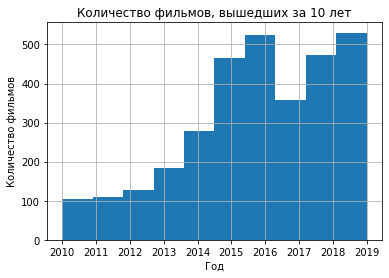

year
2010    105
2011    109
2012    127
2013    184
2014    279
2015    465
2016    525
2017    357
2018    474
2019    530
Name: title, dtype: int64

In [46]:
plt.hist(released_movies['year'], bins=10)
plt.grid(True)
plt.xticks(range(2010, 2020))
plt.title('Количество фильмов, вышедших за 10 лет')
plt.ylabel('Количество фильмов')
plt.xlabel('Год')

plt.show()
(released_movies
 .sort_values(by='year')
 .groupby('year')['title'].count()
)

Перед нами гистограмма распределения количества выпустившихся в прокат фильмов, в зависимости от года, когда эти фильмы вышли в прокат. Под гистограммой я специально вывел количество выпущенных фильмов за каждый год. Мы видим, что с каждым годом кол-во выпущенных в прокат фильмов росло. В 2010 году количество выпущенных в прокат фильмов составляло 105, а в 2019 уже 530! По мере возрастания кол-ва выпущенных в прокат фильмов мы видим спад после 2016 года. Проанализируем количество выделенных средств на фильмы за этот период, тобы выяснить с чем связан этот спад далее. Полнее всего представлен период с 2014-2019 гг.

Посчитаем долю фильмов вышедших в прокат от всего кол-ва данных.

In [47]:
print('Доля фильмов, вышедших в прокат составляет', round(released_movies.shape[0]/data.shape[0], 2))

Доля фильмов, вышедших в прокат составляет 0.42


- Изучите, как менялась динамика проката по годам. В каком году сумма сборов была минимальной? А максимальной?

Ранее мы строили гистограмму, которая показывала нам количество выпущенных фильмов по годам. Был обнаружен спад числа выпущенных фильмов в 2017 году. Изучим динамику 

In [48]:
released_pivot = released_movies.pivot_table(
    index='year', 
    values=['budget', 'support_share'], 
    aggfunc='median'
)

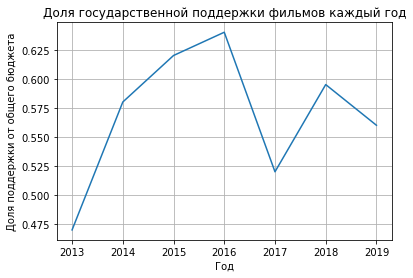

In [49]:
plt.plot(released_pivot['support_share'])
plt.grid(True)
plt.title('Доля государственной поддержки фильмов каждый год')
plt.xlabel('Год')
plt.ylabel('Доля поддержки от общего бюджета')

plt.show()

In [50]:
print('Доля государственной поддержки за 2017 год составила', released_pivot[released_pivot.index == 2017]['support_share'].median())

Доля государственной поддержки за 2017 год составила 0.52


Видно, что доля государственной поддержки в 2017 году снизилась. Это объясняет почему в 2017 году снизилось и кол-во выпущенных в прокат фильмов. Очевидно, без гос. поддержки тяжелее это осуществить. Также график показателей доли поддержки по годам напоминает гистограмму количества выпущенных фильмов. То есть государственная поддержка напрямую влияет на количество выпущенных  в прокат фильмов.

Построим график с суммой сборов погодично, используя сводную таблицу, которую создадим ниже.

In [51]:
released_budget = released_movies.pivot_table(index='year', values='box_office', aggfunc='sum')
released_budget['box_office'] = released_budget['box_office'] / 1000000 #разделим столбец на 1 млн, чтобы избежать экспоненциальных значений

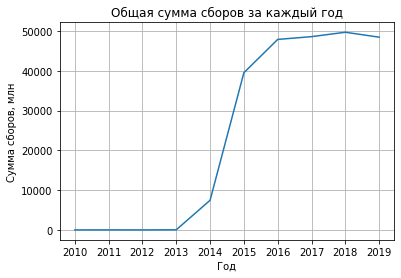

,box_office
year,
2010,2.428654
2011,14.102765
2012,6.911073
2013,29.799708
2014,7444.951857
2015,39497.365190
2016,47866.105230
2017,48563.707218
2018,49668.361909


In [52]:
plt.plot(released_budget['box_office']);
plt.xticks(range(2010, 2020, 1));
plt.title('Общая сумма сборов за каждый год')
plt.xlabel('Год')
plt.ylabel('Сумма сборов, млн')
plt.grid(True)

plt.show()

released_budget

Меньше всего денег было собрано за 2010 год. В этот период сумма сборов составляла 2,43 млн. р. Большего было собрано за 2018 год. В этот период сумма сборов составила почти 50 млрд руб., а именно 49668361909 рублей.

- С помощью сводной таблицы посчитайте среднюю и медианную сумму сборов для каждого года.

In [53]:
box_office_annual = released_movies.pivot_table(index='year', values='box_office', aggfunc=['median','mean'])
box_office_annual.columns = box_office_annual.columns.get_level_values(0) #уберем двухэтажные названия столбцов
box_office_annual['mean'] = box_office_annual['mean']/1000 #разделим на тысячу, чтобы исключить экспоненту
box_office_annual['median'] = box_office_annual['median']/1000 #разделим на тысячу, чтобы исключить экспоненту
box_office_annual

,median,mean
year,,
2010,1.7000,23.130038
2011,3.0000,129.383165
2012,5.5600,54.417898
2013,3.5225,161.954935
2014,18.1600,26684.415258
2015,4920.9330,84940.570301
2016,3915.0410,91173.533771
2017,9968.3400,136032.793328
2018,8911.5340,104785.573648


Сводную сделали, теперь строим график

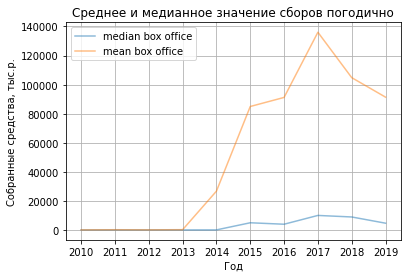

In [54]:
plt.plot(box_office_annual, alpha=0.5);
plt.xticks(range(2010, 2020, 1));
plt.grid(True)
plt.legend(('median box office', 'mean box office'))
plt.title('Среднее и медианное значение сборов погодично')
plt.xlabel('Год')
plt.ylabel('Собранные средства, тыс.р.')

plt.show()

На графике видно, что вплоть до 2013 года среднее и медианное значения сборов были низки, но после эти значения начали расти. Самые низкие показатели по сборам приходятся на 2010 год. В то время среднее и медианное значения сборов были равны 23.1 тыс. и 1.7 тыс. соответственно. Самые большие показатели приходятся на 2017 год. В этот год количество собранных средств, выраженных медианным и средним значениями, составляло 9968.3 тыс. и 136032.8 тыс. соответственно. При условии что в этот год было выпущено меньше всего фильмов, а государственная поддержка оказалась минимальной достаточно неплохие показатели. Такой разрыв между средним и медианным значениями прежде всего связан с тем, что какие-то фильмы собрали гораздо больше средств и окупились, а какие-то провалились по кассовым сборам

- Определите, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год? Фильмы с каким возрастным ограничением собрали больше всего денег в прокате? Меняется ли картина в зависимости от года? Если да, предположите, с чем это может быть связано.

In [55]:
age_restrict = released_movies.pivot_table(
        index='year', 
        columns='age_restriction', 
        values='box_office', 
        aggfunc='sum'
).div(1000000, axis=1) # поделим все значения в получившемся датафрейме на 1 млн, чтобы исключить экспоненту.

age_restrict = age_restrict[5:] #с помощью индексации выберем промежуток с 2015-2019 гг.

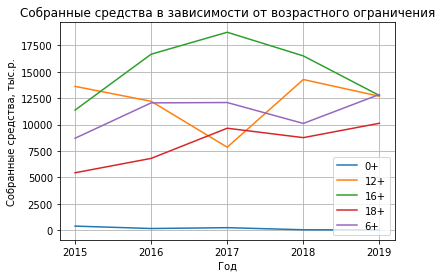

age_restriction,0+,12+,16+,18+,6+
year,,,,,
2015,379.054580,13616.082007,11368.120867,5432.308365,8701.799371
2016,150.034324,12204.446526,16664.548544,6793.929825,12053.146011
2017,229.598930,7851.427661,18745.042900,9651.495581,12086.142146
2018,32.449002,14267.250432,16503.602350,8760.085500,10104.974625
2019,17.746066,12680.198778,12753.418985,10121.796306,12852.548648


In [56]:
plt.plot(age_restrict)
plt.xticks(range(2015, 2020, 1));
plt.grid(True)
plt.legend(('0+', '12+', '16+', '18+', '6+'))
plt.title('Собранные средства в зависимости от возрастного ограничения')
plt.xlabel('Год')
plt.ylabel('Собранные средства, тыс.р.')

plt.show()
age_restrict

- Судя по получившемуся графику можно вывод о том, что __фильмы категории `0+` за все года собирали меньше всего денег__. Наверное это связано с тем, что фильмы данного рейтинга чаще всего предназначены для детской аудитории. Подросткам и взрослым просто не интересно смотреть подобные фильмы. Следующими по количеству собранных средств выступают фильмы `18+`. Четвертое место в топе по кассовым сборам они занимают по причине того, что рейтинг отсекает довольно большой пласт подростков, которые чаще всего и посещают кинотеатры. Также стоит отметить, что чаще всего фильмы 18+ представлены либо ужастиками, либо имеют сцены эротического характера, либо что-то противозаконное, что способно побудить детей к осуществлению увиденного. А у подобных фильмов не такая широкая аудитория, Следовательно и сборы у таких фильмов меньше. По кассовым сборам за все время лидером являются фильмы с рейтингом `16+`. Не удивительно, ведь чаще всего это семейные фильмы о приключениях или же известные на весь мир франшизы и саги. В общем самая популяйная категория рейтинга. Например, самые кассовые фильмы вроде Аватара, Мстителей, Человека-Паука, Форсажа имеют как раз именно такой рейтинг - 16+. __Таким образом, самые большие кассовые сборы приходятся на фильмы `16+`, самые маленькие кассовые сборы приходятся на фильмы с рейтингом `0+`__.
- Также стоит отметить, что после 2017 года ситуация меняется. Фильмы 16+, 6+ и 18+ начинают терять в показателях кассовых сборов, а фильмы 12+ наоборот, стремительно растут по показателям кассовых сборов. Может это связано с тем, что начали __набирать популярность онлайн-кинотеатры__ и прочие платформы, где можно бесплатно посмотреть кино. __Такие платформы не платят кассовые сборы, они просто заключают договора с дистрибьюторами, которые платят за прокатное удостоверение__. Но почему именно в 2017 году и так резко? Очевидно в индустрии, в стране или в мире произошло какое-то событие, которое повлияло на резкую смену объема кассовых сборов. Возможно это связано с __изменением политики выдачи прокатных удостоверений или размера пошлины.__ 

**Вывод**

В ходе исследования были сформированы следующие выводы:
 - Меньше всего фильмов было выпущено в 2010 г. Их кол-во составило 105;
 - С каждым годом количетсво выпущенных фильмов в прокат растет, точно также как и растет доля государственной поддержки; Эти показатели взаимосвязаны;
 - Наиболее полно данные представлены в периоде с 2014-2019 гг.
 - Доля фильмов, вышедших в прокат составляет 0.42;
 - В 2017 году в связи с уменьшением доли поддержки со стороны государства уменьшилось и количество фильмов выпущенных в прокат фильмов. В этот год было выпущено 357 фильмов (это на 168 фильмов меньше, чем в прошлом году), а доля гос. поддержки составила 0.52 (спад больше 10%, по сравнению с предыдущим годом, где доля составила примерно 0.64);
 - Больше всего фильмов выпущено в прокат в 2019 году - 530 картин;
 - Больше всего средств было собрано в 2018 году - почти 50 млрд рублей. Меньше всего в 2010 году - 2,43 млн рублей;
 - Среднее и медианное значения суммы сборов за 2017 год оказались наибольшими, несмотря на относительно низкое количество выпущенных фильмов в этот период и относительно низкую государственную поддержку. В этот год медианное и среднее значения сборов составили почти 10 млн и 136 млн соответственно;
 - Самые низкие показатели по среднему и медианному значению суммы сборов погодично приходятся на промежуток 2010-2013 гг.;
 - Фильмы `0+` имеют самый низкий уровень кассовых сборов. Самые большие кассовые сборы приходятся на фильмы `16+`;
 - Резкое изменение размера кассовых сборов для конкретных возрастных категорий могло быть спровоцированно несколькими причинами:
   * 1) Популярность набирают онлайн-кинотеатры, которые не платят кассовые сборы, а просто заключают договор с дистрибьюторами;
   * 2) Изменение политики выдачи прокатных удостоверений или изменение размера пошлины;
   * 3) Экономико-политические события, которые повлияли на объем кассовых сборов, платежеспособность населения и т.д.

### Шаг 4. Исследуйте фильмы, которые получили государственную поддержку

На этом этапе нет конкретных инструкций и заданий — поищите интересные закономерности в данных. Посмотрите, сколько выделяют средств на поддержку кино. Проверьте, хорошо ли окупаются такие фильмы, какой у них рейтинг.

Для начала давайте поразмышляем над тем что же такое окупаемость фильма. Если мы возьмем все затраты на производство фильма, маркетинг и т.д., то вместе мы получим бюджет. Чтобы фильм окупился, кассовые сборы (деньги, полученные с продажи тех же самых билетов на фильм) должны превышать бюджет. При этом стоит отметить, что существует возвратные средства гос. поддержки. То есть это деньги, которые надо будет вернуть государству с суммы кассовых сборов. Как правило окупаемость считается либо в процентах, либо в коэффициентах. Чтобы провести исследование об окупаемости фильмов с государственной поддержкой, создадим отдельный датафрейм.

In [57]:
supported_movies = data[(data['refundable_support'] > 0)|(data['nonrefundable_support'] > 0)]
supported_movies.sample(5)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,...,financing_source,ratings,genres,box_office,year,main_director,main_genres,support_share,payback,payback_result
5630,Ёлки Новые,111011617,2017-12-21 12:00:00,Художественный,"ООО ""ТаББаК""",None,"Д.Киселев, А.Першин (Ж.Крыжовников), А.Карпило...","Т.Бекмамбетов, Г.Стрижевская",6+,50000000.0,...,Фонд кино,5.8,"комедия,мелодрама",855451052.0,2017,Д.Киселев,комедия,0.57,4.62,окупился
7447,Вторжение,111022519,2019-12-23 12:00:00,Художественный,"ООО ""Арт Пикчерс Студия"", ООО ""Водород 2011""",None,Ф.Бондарчук,"Ф.Бондарчук, М.Врубель, А.Андрющенко, Д.Рудовский",12+,100000000.0,...,Фонд кино,5.7,"фантастика,боевик",NaN,2019,Ф.Бондарчук,фантастика,0.53,NaN,не известно
6941,Танец с саблями,111008619,2019-05-29 12:00:00,Художественный,"ООО ""Кинокомпания Флагман"" по заказу ООО ""ММЕ""",None,Ю.Разыков,"Р.Дишдишян, ООО ""МАРС МЕДИА ЭНТЕРТЕЙНМЕНТ""",16+,0.0,...,Министерство культуры,5.8,"драма,история,биография",NaN,2019,Ю.Разыков,драма,0.65,NaN,не известно
3078,Завтрак у папы,111020215,2015-12-09 12:00:00,Художественный,"ООО ""Ол Медиа Компани""",None,М.Кравченко,"Г.Шабанов, Р.Татаринцев, Э.Илоян",12+,10000000.0,...,Фонд кино,6.2,комедия,70790954.0,2015,М.Кравченко,комедия,0.53,1.07,окупился
2129,Битва за Севастополь,111001415,2015-02-20 12:00:00,Художественный,"ООО ""Кинокомпания ""Новые люди"", ООО ""Студия ""К...","Россия,Украина",С.Мокрицкий,"Н.Мокрицкая, Е.Олесов",12+,0.0,...,Министерство культуры,7.5,"биография,военный,драма",401804462.0,2015,С.Мокрицкий,биография,0.21,3.07,окупился


Далее посмотрим на графике как изменялся уровень государственной поддержки погодично и какую часть от общего бюджетва составляла гос. поддержка.

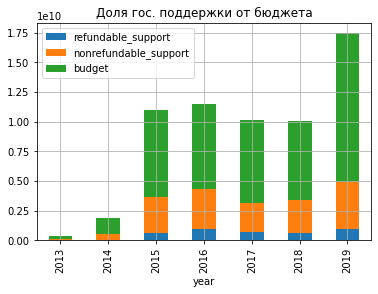

In [58]:
(
    supported_movies.groupby('year') 
            .agg('sum') 
            .sort_values(by='year',
                         ascending=True) 
            .plot(title='Доля гос. поддержки от бюджета',
                  kind='bar',
                  grid=True,
                  stacked=True,
                  y=['refundable_support', 'nonrefundable_support', 'budget'])
);

На графике видно, что 2019 год является лидером по объему государственной поддержки и размера бюджета фильмов. По итогам 2013  и 2014 гг объем бюджета фильмов оказался наименьшим. При этом в 2015 году наблюдается резкий рост бюджета фильмов и государственной поддержки. 

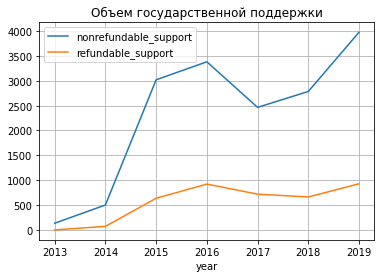

In [59]:
(
    supported_movies
    .pivot_table(
        index='year', 
        values=['refundable_support', 'nonrefundable_support'], 
        aggfunc='sum'
    )
    .div(1000000) #разделим все строки на 1 млн для исключения экспоненциальных значений
).plot(title='Объем государственной поддержки', grid=True);

На график также видно, что к 2015 году увеличился объем государственной поддержки фильмов. При этом невозвратные средства государственной поддержки превышают по объему возвратные. Возможно это связано с тем, что государство стимулировало развитие отрасли, или же повышало лояльность населения и популярности правительства.

In [60]:
len(supported_movies['ratings'].sort_values().unique()) #посмотрим число уникальных значений в столбце
                                                        #чтобы определить число корзин в гистограмме

56

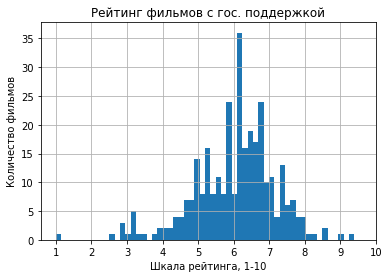

count    316.000000
mean       6.020886
std        1.148943
min        1.000000
25%        5.300000
50%        6.200000
75%        6.700000
max        9.400000
Name: ratings, dtype: float64

In [61]:
plt.hist(supported_movies['ratings'], bins=56)
plt.title('Рейтинг фильмов с гос. поддержкой')
plt.xlabel('Шкала рейтинга, 1-10')
plt.ylabel('Количество фильмов')
plt.xticks(range(1,11))
plt.grid(True)
plt.show()

supported_movies['ratings'].describe()

In [62]:
supported_movies[(supported_movies['ratings'] == 9.4)|(supported_movies['ratings'] == 1)]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,...,financing_source,ratings,genres,box_office,year,main_director,main_genres,support_share,payback,payback_result
2143,Главный,111003415,2015-03-27 12:00:00,Художественный,"ООО ""Киностудия ""МАСТЕР""",None,Ю.Кара,Ю.Кара,6+,0.0,...,Министерство культуры,9.4,"фантастика,боевик,комедия",334750.0,2015,Ю.Кара,фантастика,0.25,0.01,провалился
3511,Взломать блогеров,111016616,2016-10-28 12:00:00,Художественный,"ООО ""ТаББаК""",None,М.Свешников,Т.Бекмамбетов,6+,0.0,...,Фонд кино,1.0,"комедия,мультфильм,фантастика",7323648.0,2016,М.Свешников,комедия,0.69,0.20,провалился


Гистограмма с рейтингами отображает нормальное распределение в данных. Среднее и медианное значения примерно равны - 6 и 6.2 соответственно. То есть чаще всего фильмы с государственной поддержкой имеют рейтинг 6. Самый минимальный рейтинг у фильма М. Свешникова "Взломать блогеров". Его рейтинг составляет 1.0. При этом окупаемость у фильма составляет 20%, то есть он вообще не окупился. Самый высокий рейтинг у фильма Ю. Кара "Главный" - 9.4. При этом фильм точно также не окупился, коэффициент окупаемости составил 0.01.

Теперь посмотрим насколько хорошо окупаются эти фильмы.

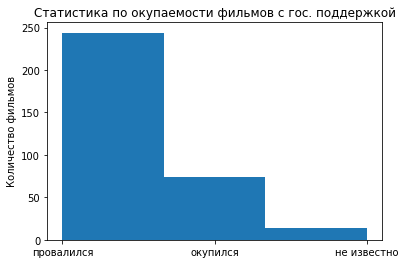

провалился     244
окупился        74
не известно     14
Name: payback_result, dtype: int64

In [63]:
plt.hist(supported_movies['payback_result'], bins=3)
plt.title('Статистика по окупаемости фильмов с гос. поддержкой')
plt.ylabel('Количество фильмов')
plt.show()

supported_movies['payback_result'].value_counts()

Из 322 фильмов, получивших государственную поддержку окупились только 74, это 23%, меньше 1/4 от всей выборки. Провалившихся картин еще больше, их число составляет 244, это 76% от всей выборки. Видимо поддержка государства не помогла картинам окупиться.

__Вывод__

В ходе исследования фильмов с поддежкой со стороны государства были выявлены следующие закономерности:
 * Наибольший бюджет у фильмов с государственной поддержкой наблюдался в 2019 году. Самые низкие показатели объема бюджет пришлись на 2013 и 2014 гг.;
 * С 2014-2015 год наблюдается резкий скачек роста объема бюджета кинокартин. В этот же период повышается стимулирование отрасли со стороны государства. Возможно это связано с каким-то политико-экономическим событием. Также государство может просто повышать популярность своего правительства и лояльность населения;
 * Чаще всего фильмы, которые имели государственную поддержку имели рейтинг 6. Самый высокий рейтинг у фильма Ю. Кара "Главный" - 9.4. Самый низкий у М. Свешникова "Взломать блогеров" - 1.
 * Окупаемость фильмов с государственной поддержкой составляет 23%, чаще всего эти картины проваливаются. 


### Шаг 5. Напишите общий вывод

В данном проекте был исследован вопрос о российском кинопрокате. Мы исследовали данные, осуществили предобработку. В ходе исследования поднимались вопросы о количестве фильмов, вышедших в прокат с 2010-2019 гг., проанализирована динамика проката по годам, а также динамика объема кассовых сборов этих фильмов. Также мы затронули зависимость разных показателей от возрастного ограничения фильмов.
_______
В ходе предобработки данных были выполнены следующие действия:
 * Изменили тип данных в столбце `show_start_date` на `datetime`;
 * Округлили значения в столбцах с возвратной и невозвратной поддержкой со стороны государства, а также в столбце с бюджетом фильма;
 * Изменили тип данных в столбце с рейтингом со строкового на вещественночисленный, а также перед этим исправили в столбце некорректные значения рейтинга;
 * Округлили значения в столбце с кассовыми сборами;
 * Построили хитмэп с пропусками в столбцах, чтобы посмотреть какие закономерности присутствуют. Как оказалось пропуски в столбцах с гос. поддержкой и бюджетом присутствовали только в фильмах неотечественного производства - очевидно статистика по другим странам просто-напросто не велась;
 * Удалили строки с пропусками в столбцах с режиссером, страной производства и студией, где снимали фильм (0.4% данных);
 * Обработаны столбцы с категориальными значениями. В этих столбцах с типом фильма, а также страной производтсва была выявлена одна проблема - человеческий фактор заполнения данных. В некоторых строках присутствовали личние пробелы, где-то вместе запятой стоял дефис, где-то в самих словах присутствовали знаки препинания. В ходе предобработки мы избавились от этих недочетов;
 * Заменили значения в столбце с возрастными ограничениями на более короткие, для удобства исследования;
 * Добавили новые столбцы со значениями года релиза, основного жанра, главного режиссера, долей государственной поддержки, а также окупаемости фильмов и результата окупаемости.
 ____

В ходе исследовательского анализа были выявлены следующие закономерности:
 * __Исследование количеств фильмов, вышедших в прокат__
 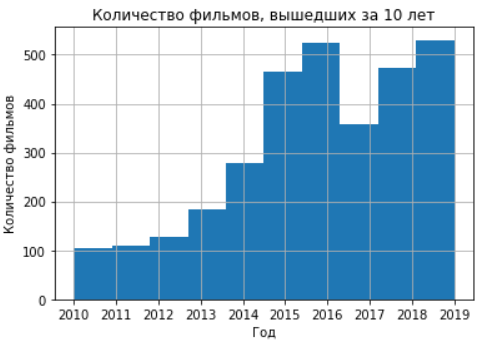
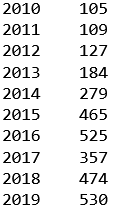
Перед нами гистограмма распределения количества выпустившихся в прокат фильмов, в зависимости от года, когда эти фильмы вышли в прокат. Под гистограммой я специально вывел количество выпущенных фильмов за каждый год. Мы видим, что с каждым годом кол-во выпущенных в прокат фильмов росло. В 2010 году количество выпущенных в прокат фильмов составляло 105, а в 2019 уже 530! По мере возрастания кол-ва выпущенных в прокат фильмов мы видим спад после 2016 года. Проанализируем количество выделенных средств на фильмы за этот период, тобы выяснить с чем связан этот спад далее. Полнее всего представлен период с 2014-2019 гг.

* __Динамика проката по годам__.
 Ранее мы строили гистограмму, которая показывала нам количество выпущенных фильмов по годам. Был обнаружен спад числа выпущенных фильмов в 2017 году. 
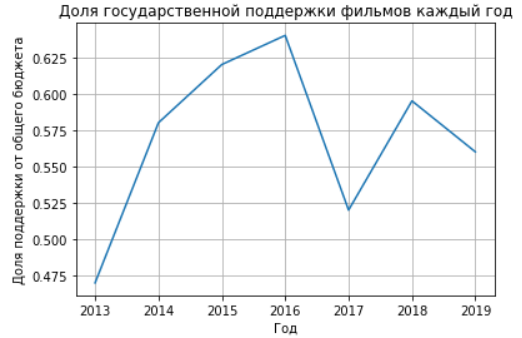
Видно, что доля государственной поддержки в 2017 году снизилась. Это объясняет почему в 2017 году снизилось и кол-во выпущенных в прокат фильмов. Очевидно, без гос. поддержки тяжелее это осуществить. Также график показателей доли поддержки по годам напоминает гистограмму количества выпущенных фильмов. То есть государственная поддержка напрямую влияет на количество выпущенных  в прокат фильмов.
 - В 2017 году в связи с уменьшением доли поддержки со стороны государства уменьшилось и количество фильмов выпущенных в прокат фильмов. В этот год было выпущено 357 фильмов (это на 168 фильмов меньше, чем в прошлом году), а доля гос. поддержки составила 0.52 (спад больше 10%, по сравнению с предыдущим годом, где доля составила примерно 0.64);
 
 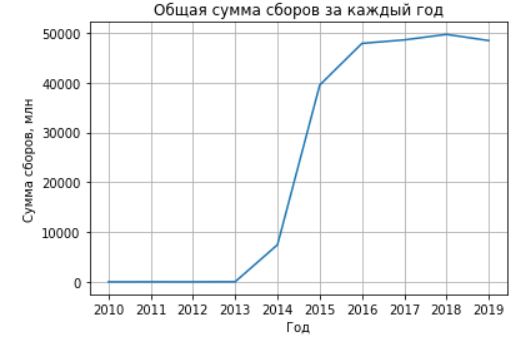
 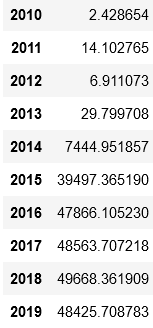
Меньше всего денег было собрано за 2010 год. В этот период сумма сборов составляла 2,43 млн. р. Большего было собрано за 2018 год. В этот период сумма сборов составила почти 50 млрд руб., а именно 49668361909 рублей.

 * __Средняя и медианная сумма сборов__
 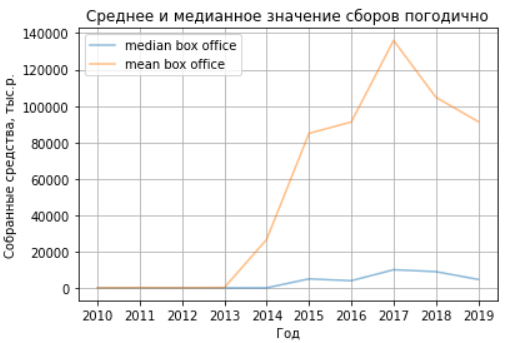
 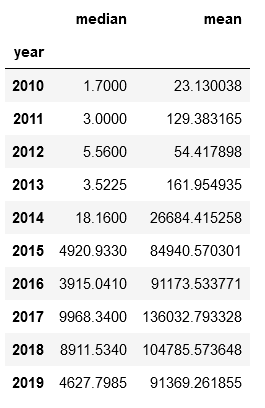
 На графике видно, что вплоть до 2013 года среднее и медианное значения сборов были низки, но после эти значения начали расти. Самые низкие показатели по сборам приходятся на 2010 год. В то время среднее и медианное значения сборов были равны 23.1 тыс. и 1.7 тыс. соответственно. Самые большие показатели приходятся на 2017 год. В этот год количество собранных средств, выраженных медианным и средним значениями, составляло 9968.3 тыс. и 136032.8 тыс. соответственно. При условии что в этот год было выпущено меньше всего фильмов, а государственная поддержка оказалась минимальной достаточно неплохие показатели. Такой разрыв между средним и медианным значениями прежде всего связан с тем, что какие-то фильмы собрали гораздо больше средств и окупились, а какие-то провалились по кассовым сборам

* __Возрастное ограничение__
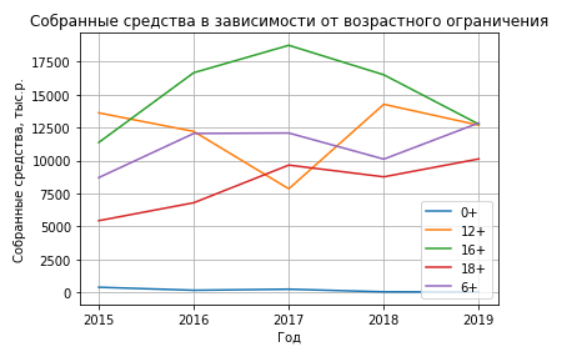
- Судя по получившемуся графику можно вывод о том, что __фильмы категории `0+` за все года собирали меньше всего денег__. Наверное это связано с тем, что фильмы данного рейтинга чаще всего предназначены для детской аудитории. Подросткам и взрослым просто не интересно смотреть подобные фильмы. Следующими по количеству собранных средств выступают фильмы `18+`. Четвертое место в топе по кассовым сборам они занимают по причине того, что рейтинг отсекает довольно большой пласт подростков, которые чаще всего и посещают кинотеатры. Также стоит отметить, что чаще всего фильмы 18+ представлены либо ужастиками, либо имеют сцены эротического характера, либо что-то противозаконное, что способно побудить детей к осуществлению увиденного. А у подобных фильмов не такая широкая аудитория, Следовательно и сборы у таких фильмов меньше. По кассовым сборам за все время лидером являются фильмы с рейтингом `16+`. Не удивительно, ведь чаще всего это семейные фильмы о приключениях или же известные на весь мир франшизы и саги. В общем самая популяйная категория рейтинга. Например, самые кассовые фильмы вроде Аватара, Мстителей, Человека-Паука, Форсажа имеют как раз именно такой рейтинг - 16+. __Таким образом, самые большие кассовые сборы приходятся на фильмы `16+`, самые маленькие кассовые сборы приходятся на фильмы с рейтингом `0+`__.
- Также стоит отметить, что после 2017 года ситуация меняется. Фильмы 16+, 6+ и 18+ начинают терять в показателях кассовых сборов, а фильмы 12+ наоборот, стремительно растут по показателям кассовых сборов. Может это связано с тем, что начали __набирать популярность онлайн-кинотеатры__ и прочие платформы, где можно бесплатно посмотреть кино. __Такие платформы не платят кассовые сборы, они просто заключают договора с дистрибьюторами, которые платят за прокатное удостоверение__. Но почему именно в 2017 году и так резко? Очевидно в индустрии, в стране или в мире произошло какое-то событие, которое повлияло на резкую смену объема кассовых сборов. Возможно это связано с __изменением политики выдачи прокатных удостоверений или размера пошлины.__ 

__Вывод__:
 - Меньше всего фильмов было выпущено в 2010 г. Их кол-во составило 105;
 - С каждым годом количетсво выпущенных фильмов в прокат растет, точно также как и растет доля государственной поддержки; Эти показатели взаимосвязаны;
 - Наиболее полно данные представлены в периоде с 2014-2019 гг.
 - Доля фильмов, вышедших в прокат составляет 0.42;
 - В 2017 году в связи с уменьшением доли поддержки со стороны государства уменьшилось и количество фильмов выпущенных в прокат фильмов. В этот год было выпущено 357 фильмов (это на 168 фильмов меньше, чем в прошлом году), а доля гос. поддержки составила 0.52 (спад больше 10%, по сравнению с предыдущим годом, где доля составила примерно 0.64);
 - Больше всего фильмов выпущено в прокат в 2019 году - 530 картин;
 - Больше всего средств было собрано в 2018 году - почти 50 млрд рублей. Меньше всего в 2010 году - 2,43 млн рублей;
 - Среднее и медианное значения суммы сборов за 2017 год оказались наибольшими, несмотря на относительно низкое количество выпущенных фильмов в этот период и относительно низкую государственную поддержку. В этот год медианное и среднее значения сборов составили почти 10 млн и 136 млн соответственно;
 - Самые низкие показатели по среднему и медианному значению суммы сборов погодично приходятся на промежуток 2010-2013 гг.;
 - Фильмы `0+` имеют самый низкий уровень кассовых сборов. Самые большие кассовые сборы приходятся на фильмы `16+`;
 - Резкое изменение размера кассовых сборов для конкретных возрастных категорий могло быть спровоцированно несколькими причинами:
   * 1) Популярность набирают онлайн-кинотеатры, которые не платят кассовые сборы, а просто заключают договор с дистрибьюторами;
   * 2) Изменение политики выдачи прокатных удостоверений или изменение размера пошлины;
   * 3) Экономико-политические события, которые повлияли на объем кассовых сборов, платежеспособность населения и т.д.

* __Исследование фильмов, получивших государственную поддержку__

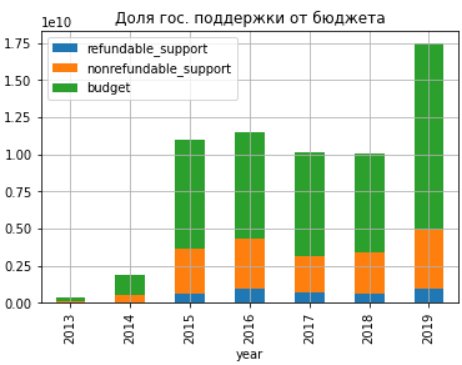
На графике видно, что 2019 год является лидером по объему государственной поддержки и размера бюджета фильмов. По итогам 2013  и 2014 гг объем бюджета фильмов оказался наименьшим. При этом в 2015 году наблюдается резкий рост бюджета фильмов и государственной поддержки. 
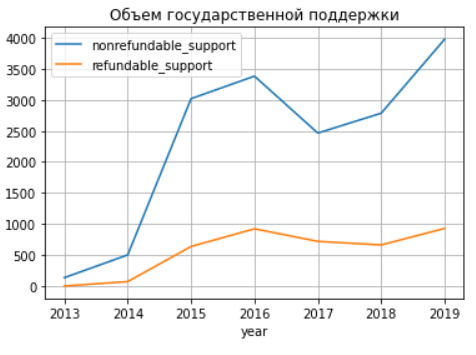
На график также видно, что к 2015 году увеличился объем государственной поддержки фильмов. При этом невозвратные средства государственной поддержки превышают по объему возвратные. Возможно это связано с тем, что государство стимулировало развитие отрасли, или же повышало лояльность населения и популярности правительства.
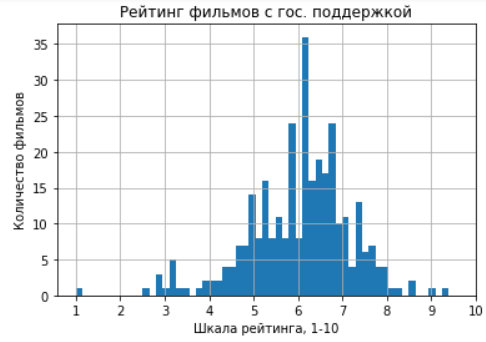
Гистограмма с рейтингами отображает нормальное распределение в данных. Среднее и медианное значения примерно равны - 6 и 6.2 соответственно. То есть чаще всего фильмы с государственной поддержкой имеют рейтинг 6. Самый минимальный рейтинг у фильма М. Свешникова "Взломать блогеров". Его рейтинг составляет 1.0. При этом окупаемость у фильма составляет 20%, то есть он вообще не окупился. Самый высокий рейтинг у фильма Ю. Кара "Главный" - 9.4. При этом фильм точно также не окупился, коэффициент окупаемости составил 0.01.
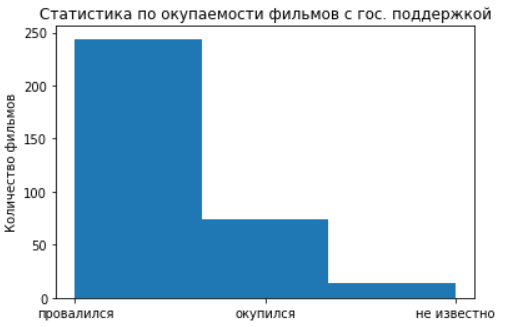
Из 322 фильмов, получивших государственную поддержку окупились только 74, это 23%, меньше 1/4 от всей выборки. Провалившихся картин еще больше, их число составляет 244, это 76% от всей выборки. Видимо поддержка государства не помогла картинам окупиться.

В ходе исследования фильмов с поддежкой со стороны государства были выявлены следующие закономерности:
 * Наибольший бюджет у фильмов с государственной поддержкой наблюдался в 2019 году. Самые низкие показатели объема бюджет пришлись на 2013 и 2014 гг.;
 * С 2014-2015 год наблюдается резкий скачек роста объема бюджета кинокартин. В этот же период повышается стимулирование отрасли со стороны государства. Возможно это связано с каким-то политико-экономическим событием. Также государство может просто повышать популярность своего правительства и лояльность населения;
 * Чаще всего фильмы, которые имели государственную поддержку имели рейтинг 6. Самый высокий рейтинг у фильма Ю. Кара "Главный" - 9.4. Самый низкий у М. Свешникова "Взломать блогеров" - 1.
 * Окупаемость фильмов с государственной поддержкой составляет 23%, чаще всего эти картины проваливаются. 
